In [ ]:
# Loading the required libraries
import io
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
# Loading the datasets

# Interest by Region
AIChatbotInterestByRegion = pd.read_csv("AIChatbotInterestByRegion.csv", skiprows=1)
AIRetailInterestByRegion = pd.read_csv("AIRetailInterestByRegion.csv", skiprows=1)
PredictiveAnalyticsInterestByRegion = pd.read_csv("PredictiveAnalyticsInterestByRegion.csv", skiprows=1)

# Interest Over Time + Compared Regions
ComparedInterestOverTime = pd.read_csv("ComparedInterestOverTime.csv", skiprows=2)
ComparedRegion = pd.read_csv("ComparedRegion.csv", skiprows=1)

In [ ]:
# Defining a function to load Related Queries
def loadRelatedQueries(path):
    with open(path, "r", encoding="utf-8") as f:
        content = f.read().split("\n\n")
    tables = {}
    for block in content:
        lines = block.strip().split("\n")
        if len(lines) > 1:
            title = lines[0].strip().lower()   # make lowercase
            if "top" in title:
                key = "TOP"
            elif "rising" in title:
                key = "RISING"
            else:
                key = title
            df = pd.read_csv(io.StringIO("\n".join(lines[1:])))
            tables[key] = df
    return tables

In [ ]:
# Using the function to load the Related Queries datasets
AIChatbotRelatedQueries = loadRelatedQueries("AIChatbotRelatedQueries.csv")
AIRetailRelatedQueries = loadRelatedQueries("AIRetailRelatedQueries.csv")
PredictiveAnalyticsRelatedQueries = loadRelatedQueries("PredictiveAnalyticsRelatedQueries.csv")

In [ ]:
# Displaying the first few rows of the AI Chatbot Interest By Region
AIChatbotInterestByRegion.head()

,Country,AI Chatbot: (9/2/20 - 9/2/25)
0,Solomon Islands,NaN
1,Vanuatu,NaN
2,Papua New Guinea,100
3,Zimbabwe,84
4,Botswana,NaN


In [ ]:
# Printing the information of AI Chatbot Interest By Region
AIChatbotInterestByRegion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        250 non-null    object
 1   AI Chatbot: (9/2/20 - 9/2/25)  75 non-null     object
dtypes: object(2)
memory usage: 4.0+ KB


In [ ]:
# Displaying the first few rows of the AI in Retail Interest By Region
AIRetailInterestByRegion.head()

,Country,AI in Retail: (9/2/20 - 9/2/25)
0,St. Helena,100
1,Brunei,NaN
2,Singapore,40
3,Zimbabwe,NaN
4,Kenya,26


In [ ]:
# Displaying the first few rows of the Predictive Analytics Interest By Region
PredictiveAnalyticsInterestByRegion.head()

,Country,Predictive analytics: (9/2/20 - 9/2/25)
0,St. Helena,100.0
1,China,79.0
2,Singapore,71.0
3,St. Vincent & Grenadines,NaN
4,Zimbabwe,NaN


In [ ]:
# Printing the information of Predictive Analytics Interest By Region
PredictiveAnalyticsInterestByRegion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  250 non-null    object 
 1   Predictive analytics: (9/2/20 - 9/2/25)  69 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
# Displaying the first few rows of the Compared Interest Over Time
ComparedInterestOverTime.head()

,Week,AI Chatbot: (Worldwide),AI in Retail: (Worldwide),Predictive analytics: (Worldwide)
0,2020-08-30,2,<1,12
1,2020-09-06,2,<1,13
2,2020-09-13,2,<1,13
3,2020-09-20,2,<1,13
4,2020-09-27,2,<1,12


In [ ]:
# Printing the information of Compared Interest Over Time
ComparedInterestOverTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Week                               262 non-null    object
 1   AI Chatbot: (Worldwide)            262 non-null    int64 
 2   AI in Retail: (Worldwide)          262 non-null    object
 3   Predictive analytics: (Worldwide)  262 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.3+ KB


In [ ]:
# Displaying the first few rows of the Compared Region
ComparedRegion.head()

,Country,AI Chatbot: (9/2/20 - 9/2/25),AI in Retail: (9/2/20 - 9/2/25),Predictive analytics: (9/2/20 - 9/2/25)
0,Solomon Islands,NaN,NaN,NaN
1,Vanuatu,NaN,NaN,NaN
2,Papua New Guinea,95%,NaN,5%
3,Zimbabwe,83%,1%,16%
4,Botswana,NaN,NaN,NaN


In [ ]:
# Printing the information of Compared Region
ComparedRegion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Country                                  250 non-null    object
 1   AI Chatbot: (9/2/20 - 9/2/25)            75 non-null     object
 2   AI in Retail: (9/2/20 - 9/2/25)          64 non-null     object
 3   Predictive analytics: (9/2/20 - 9/2/25)  75 non-null     object
dtypes: object(4)
memory usage: 7.9+ KB


In [ ]:
# Displaying the contents of the AIChatbotRelatedQueries dictionary
display(AIChatbotRelatedQueries)

{'category: all categories': Empty DataFrame
 Columns: [AI Chatbot: (9/2/20 - 9/2/25, Worldwide)]
 Index: [],
 'TOP':                    chat  100
 0               ai chat   99
 1          free chatbot   74
 2       free ai chatbot   72
 3               free ai   72
 4               chatgpt   72
 5            chatgpt ai   71
 6    ai chatbot chatgpt   70
 7    chatgpt ai chatbot   68
 8       chatgpt chatbot   65
 9        ai chatbot gpt   57
 10          gpt chatbot   55
 11                  gpt   55
 12       google chatbot   52
 13    google chatbot ai   52
 14              best ai   51
 15            google ai   50
 16      best ai chatbot   46
 17           what is ai   36
 18      what is chatbot   36
 19   what is ai chatbot   36
 20          ai chat gpt   36
 21             chat gpt   35
 22  chat gpt ai chatbot   34
 23    ai online chatbot   32,
 'RISING':                    chatgpt  Breakout
 0               chatgpt ai  Breakout
 1       ai chatbot chatgpt  Breakout
 2      

In [ ]:
# Displaying the contents of the AIRetailRelatedQueries dictionary
display(AIRetailRelatedQueries)

{'category: all categories': Empty DataFrame
 Columns: [AI in Retail: (9/2/20 - 9/2/25, Worldwide)]
 Index: [],
 'TOP':                                         ai for retail  100
 0                                      what is retail   43
 1                                          what is ai   42
 2                                     retail industry   22
 3                               ai in retail industry   22
 4                                           google ai   16
 5                                             ai news   16
 6                                        ai marketing   12
 7                                             free ai   12
 8                                       generative ai   12
 9                             generative ai in retail   12
 10                                     retail meaning   10
 11                                         ai meaning   10
 12                                         chatgpt ai    8
 13                                      

In [ ]:
# Displaying the contents of the PredictiveAnalyticsRelatedQueries dictionary
display(PredictiveAnalyticsRelatedQueries)

{'category: all categories': Empty DataFrame
 Columns: [Predictive analytics: (9/2/20 - 9/2/25, Worldwide)]
 Index: [],
 'TOP':                            predictive  100
 0                           analytics   52
 1                predictive analytics   48
 2                                 the   21
 3                                data   20
 4                     predictive data   18
 5                                what   16
 6                 predictive analysis   12
 7                  what is predictive   11
 8                      data analytics   11
 9           predictive data analytics   10
 10                   predictive model   10
 11                              which    9
 12                   machine learning    7
 13                        descriptive    7
 14                predictive modeling    7
 15                       prescriptive    6
 16                      predictive ai    6
 17        predictive machine learning    6
 18                  predictive model

In [ ]:
# Replacing "<1" with 0, fill NaN with 0, and converting to numeric for AIChatbotInterestByRegion
AIChatbotInterestByRegion.iloc[:, 1] = AIChatbotInterestByRegion.iloc[:, 1].astype(str).str.replace('<1', '0').str.replace('nan', '0')
AIChatbotInterestByRegion.iloc[:, 1] = pd.to_numeric(AIChatbotInterestByRegion.iloc[:, 1])

In [ ]:
# Replacing "<1" with 0, fill NaN with 0, and converting to numeric for AIRetailInterestByRegion
AIRetailInterestByRegion.iloc[:, 1] = AIRetailInterestByRegion.iloc[:, 1].astype(str).str.replace('<1', '0').str.replace('nan', '0')
AIRetailInterestByRegion.iloc[:, 1] = pd.to_numeric(AIRetailInterestByRegion.iloc[:, 1])

In [ ]:
# Replacing "<1" with 0, fill NaN with 0, and converting to numeric for PredictiveAnalyticsInterestByRegion
PredictiveAnalyticsInterestByRegion.iloc[:, 1] = PredictiveAnalyticsInterestByRegion.iloc[:, 1].astype(str).str.replace('<1', '0').str.replace('nan', '0')
PredictiveAnalyticsInterestByRegion.iloc[:, 1] = pd.to_numeric(PredictiveAnalyticsInterestByRegion.iloc[:, 1])

/tmp/ipython-input-2085951502.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      100.0
1       79.0
2       71.0
3          0
4          0
       ...  
245        0
246        0
247        0
248        0
249        0
Name: Predictive analytics: (9/2/20 - 9/2/25), Length: 250, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  PredictiveAnalyticsInterestByRegion.iloc[:, 1] = PredictiveAnalyticsInterestByRegion.iloc[:, 1].astype(str).str.replace('<1', '0').str.replace('nan', '0')


In [ ]:
# Replacing "<1" with 0 in the relevant columns in ComparedInterestOverTime
for col in ['AI Chatbot: (Worldwide)', 'AI in Retail: (Worldwide)', 'Predictive analytics: (Worldwide)']:
    ComparedInterestOverTime[col] = ComparedInterestOverTime[col].astype(str).str.replace('<1', '0')

In [ ]:
# Converting the interest columns to numeric
for col in ['AI Chatbot: (Worldwide)', 'AI in Retail: (Worldwide)', 'Predictive analytics: (Worldwide)']:
    ComparedInterestOverTime[col] = pd.to_numeric(ComparedInterestOverTime[col], errors='coerce')

In [ ]:
# Filling any remaining NaN values with 0
ComparedInterestOverTime.fillna(0, inplace=True)

In [ ]:
# Converting the 'Week' column to datetime
ComparedInterestOverTime['Week'] = pd.to_datetime(ComparedInterestOverTime['Week'])

In [ ]:
# Printing the updated AIChatbotInterestByRegion Information
display(AIChatbotInterestByRegion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        250 non-null    object
 1   AI Chatbot: (9/2/20 - 9/2/25)  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


None

In [ ]:
# Printing the updated AIRetailInterestByRegion Information
display(AIRetailInterestByRegion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Country                          250 non-null    object
 1   AI in Retail: (9/2/20 - 9/2/25)  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


None

In [ ]:
# Printing the updated PredictiveAnalyticsInterestByRegion Information
display(PredictiveAnalyticsInterestByRegion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Country                                  250 non-null    object
 1   Predictive analytics: (9/2/20 - 9/2/25)  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


None

In [ ]:
# Displaying the information
ComparedInterestOverTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Week                               262 non-null    datetime64[ns]
 1   AI Chatbot: (Worldwide)            262 non-null    int64         
 2   AI in Retail: (Worldwide)          262 non-null    int64         
 3   Predictive analytics: (Worldwide)  262 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.3 KB


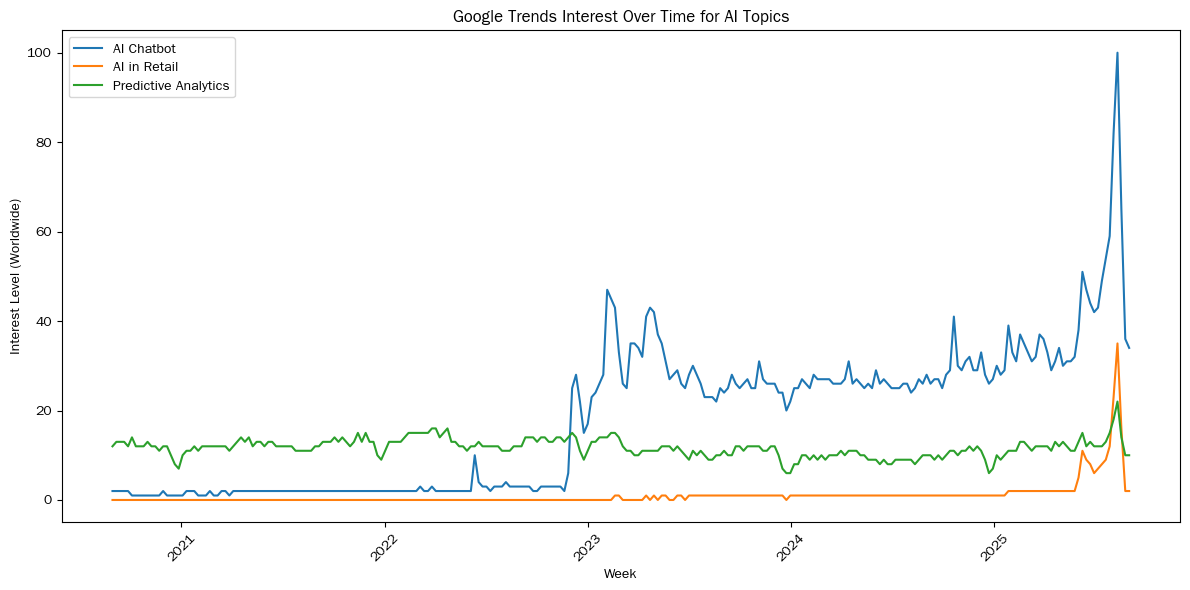

In [ ]:
# Creating a time series plot to visualize the interest trends for AI Chatbot, AI in Retail, and Predictive Analytics over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ComparedInterestOverTime['Week'], ComparedInterestOverTime['AI Chatbot: (Worldwide)'], label='AI Chatbot')
ax.plot(ComparedInterestOverTime['Week'], ComparedInterestOverTime['AI in Retail: (Worldwide)'], label='AI in Retail')
ax.plot(ComparedInterestOverTime['Week'], ComparedInterestOverTime['Predictive analytics: (Worldwide)'], label='Predictive Analytics')
ax.set_title('Google Trends Interest Over Time for AI Topics')
ax.set_xlabel('Week')
ax.set_ylabel('Interest Level (Worldwide)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Sorting and displaying top 10 for AI Chatbot
display(AIChatbotInterestByRegion.sort_values(by=AIChatbotInterestByRegion.columns[1], ascending=False).head(10))

,Country,AI Chatbot: (9/2/20 - 9/2/25)
2,Papua New Guinea,100
3,Zimbabwe,84
12,Ethiopia,32
14,Philippines,29
22,Tanzania,20
32,South Africa,17
31,Pakistan,17
28,Ghana,17
27,Singapore,17
34,Kenya,16


In [ ]:
# Sorting and display top 10 for AI in Retail
display(AIRetailInterestByRegion.sort_values(by=AIRetailInterestByRegion.columns[1], ascending=False).head(10))

,Country,AI in Retail: (9/2/20 - 9/2/25)
0,St. Helena,100
2,Singapore,40
4,Kenya,26
5,United States,26
8,South Africa,20
10,China,20
9,India,20
11,Hong Kong,20
7,United Arab Emirates,20
22,Sri Lanka,13


In [ ]:
# Sorting and displaying top 10 for Predictive Analytics
display(PredictiveAnalyticsInterestByRegion.sort_values(by=PredictiveAnalyticsInterestByRegion.columns[1], ascending=False).head(10))

,Country,Predictive analytics: (9/2/20 - 9/2/25)
0,St. Helena,100.0
1,China,79.0
2,Singapore,71.0
6,Ethiopia,53.0
7,Kenya,52.0
10,Philippines,41.0
9,South Korea,41.0
17,Hong Kong,32.0
20,United States,29.0
22,India,29.0


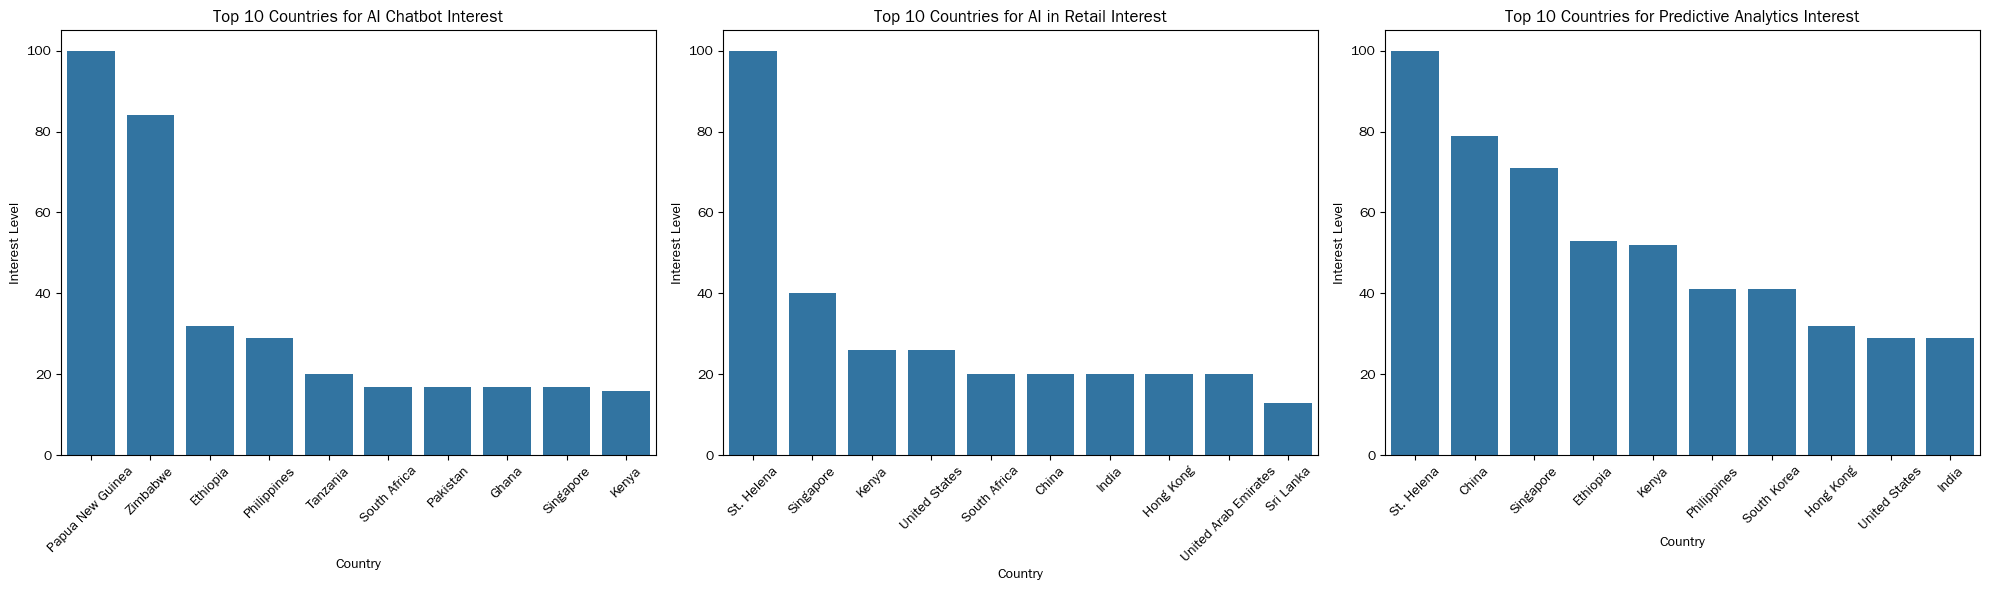

In [ ]:
# Creating a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plotting AI Chatbot Interest By Region
sns.barplot(ax=axes[0], x='Country', y=AIChatbotInterestByRegion.columns[1], data=AIChatbotInterestByRegion.sort_values(by=AIChatbotInterestByRegion.columns[1], ascending=False).head(10))
axes[0].set_title('Top 10 Countries for AI Chatbot Interest')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Interest Level')
axes[0].tick_params(axis='x', rotation=45)

# Plotting AI in Retail Interest By Region
sns.barplot(ax=axes[1], x='Country', y=AIRetailInterestByRegion.columns[1], data=AIRetailInterestByRegion.sort_values(by=AIRetailInterestByRegion.columns[1], ascending=False).head(10))
axes[1].set_title('Top 10 Countries for AI in Retail Interest')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Interest Level')
axes[1].tick_params(axis='x', rotation=45)

# Plotting Predictive Analytics Interest By Region
sns.barplot(ax=axes[2], x='Country', y=PredictiveAnalyticsInterestByRegion.columns[1], data=PredictiveAnalyticsInterestByRegion.sort_values(by=PredictiveAnalyticsInterestByRegion.columns[1], ascending=False).head(10))
axes[2].set_title('Top 10 Countries for Predictive Analytics Interest')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Interest Level')
axes[2].tick_params(axis='x', rotation=45)

# Adjusting layout and displaying plots
plt.tight_layout()
plt.show()

In [ ]:
# Displaying the 'TOP' and 'RISING' for AIChatbotRelatedQueries
display(AIChatbotRelatedQueries['TOP'])

,chat,100
0,ai chat,99
1,free chatbot,74
2,free ai chatbot,72
3,free ai,72
4,chatgpt,72
5,chatgpt ai,71
6,ai chatbot chatgpt,70
7,chatgpt ai chatbot,68
8,chatgpt chatbot,65
9,ai chatbot gpt,57


In [ ]:
display(AIChatbotRelatedQueries['RISING'])

,chatgpt,Breakout
0,chatgpt ai,Breakout
1,ai chatbot chatgpt,Breakout
2,chatgpt ai chatbot,Breakout
3,chatgpt chatbot,Breakout
4,ai chat gpt,Breakout
5,chat gpt,Breakout
6,bard,Breakout
7,bard chatbot,Breakout
8,gemini ai chatbot,Breakout
9,google ai bard,Breakout


In [ ]:
# Displaying the 'TOP' and 'RISING' for AIRetailRelatedQueries
display(AIRetailRelatedQueries['TOP'])

,ai for retail,100
0,what is retail,43
1,what is ai,42
2,retail industry,22
3,ai in retail industry,22
4,google ai,16
5,ai news,16
6,ai marketing,12
7,free ai,12
8,generative ai,12
9,generative ai in retail,12


In [ ]:
display(AIRetailRelatedQueries['RISING'])

,generative ai,Breakout
0,generative ai in retail,Breakout
1,chatgpt ai,Breakout
2,perplexity ai,Breakout
3,what is generative ai,Breakout
4,openai,Breakout
5,claude ai,Breakout
6,gemini ai,Breakout
7,meta ai,Breakout
8,agentic ai,Breakout
9,ai detector,Breakout


In [ ]:
# Displaying the 'TOP' and 'RISING' for PredictiveAnalyticsRelatedQueries
display(PredictiveAnalyticsRelatedQueries['TOP'])

,predictive,100
0,analytics,52
1,predictive analytics,48
2,the,21
3,data,20
4,predictive data,18
5,what,16
6,predictive analysis,12
7,what is predictive,11
8,data analytics,11
9,predictive data analytics,10


In [ ]:
display(PredictiveAnalyticsRelatedQueries['RISING'])

,generative ai,Breakout
0,generative ai vs predictive ai,Breakout
1,what are heuristics in decision making?,"+1,950%"
2,programación predictiva,"+1,950%"
3,aveva predictive analytics,"+1,300%"
4,predictive programing,"+1,250%"
5,paraphrasing tool,+900%
6,分析 預測 圖,+750%
7,ai and predictive analytics,+750%
8,diagnostic analysis,+700%
9,what is descriptive analytics,+550%


In [ ]:
# Creating a rolling mean (12-week window) to smooth trends
ComparedInterestOverTime_Rolling = ComparedInterestOverTime.copy()
ComparedInterestOverTime_Rolling[['AI Chatbot: (Worldwide)',
                                  'AI in Retail: (Worldwide)',
                                  'Predictive analytics: (Worldwide)']] = \
ComparedInterestOverTime_Rolling[['AI Chatbot: (Worldwide)',
                                  'AI in Retail: (Worldwide)',
                                  'Predictive analytics: (Worldwide)']].rolling(window=12, min_periods=1).mean()

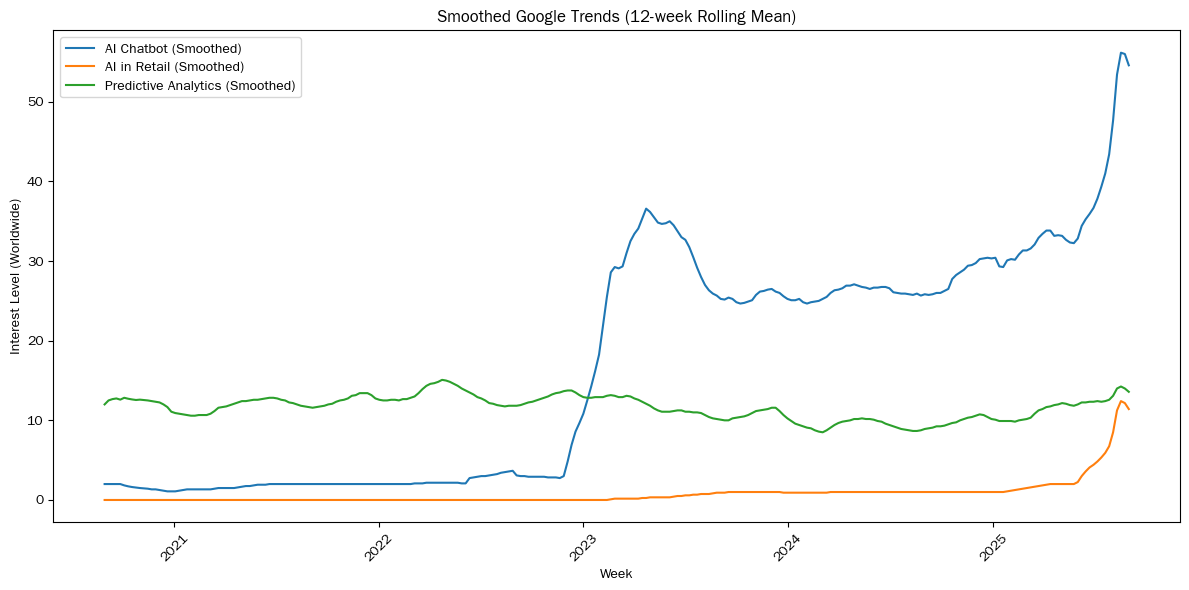

In [ ]:
# Plotting the smoothed time series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ComparedInterestOverTime_Rolling['Week'], ComparedInterestOverTime_Rolling['AI Chatbot: (Worldwide)'], label='AI Chatbot (Smoothed)')
ax.plot(ComparedInterestOverTime_Rolling['Week'], ComparedInterestOverTime_Rolling['AI in Retail: (Worldwide)'], label='AI in Retail (Smoothed)')
ax.plot(ComparedInterestOverTime_Rolling['Week'], ComparedInterestOverTime_Rolling['Predictive analytics: (Worldwide)'], label='Predictive Analytics (Smoothed)')
ax.set_title('Smoothed Google Trends (12-week Rolling Mean)')
ax.set_xlabel('Week')
ax.set_ylabel('Interest Level (Worldwide)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

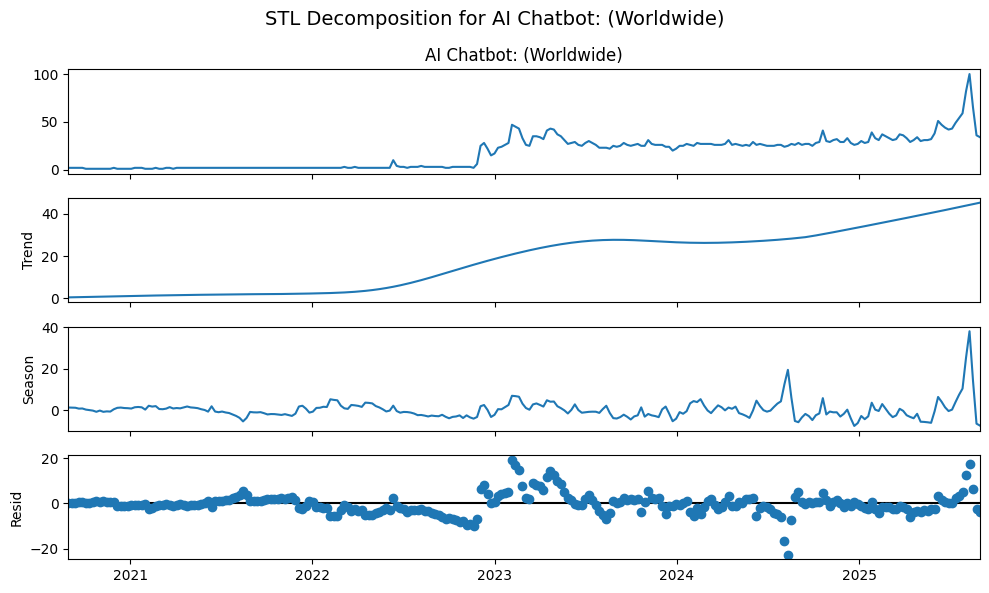

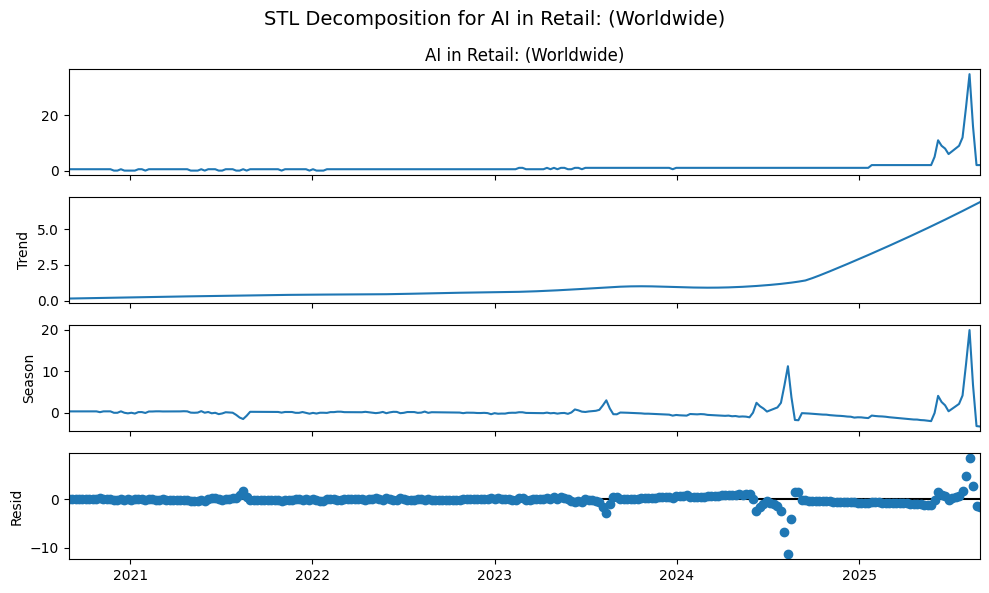

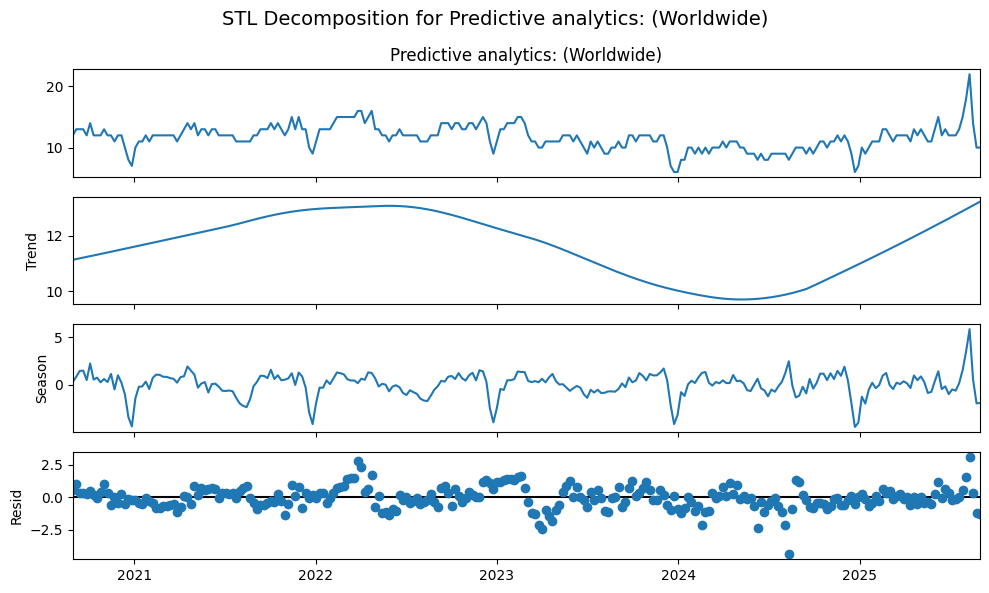

In [ ]:
# Plotting the Seasonal-Trend decomposition
for col in df.columns:
    if col != 'Week':
        df[col] = pd.to_numeric(df[col], errors='coerce')

for col in ['AI Chatbot: (Worldwide)', 'AI in Retail: (Worldwide)', 'Predictive analytics: (Worldwide)']:
    try:
        series = df.set_index('Week')[col].asfreq('W')
        series = series.interpolate().fillna(0)

        stl = sm.tsa.STL(series, period=52)
        result = stl.fit()

        fig = result.plot()
        fig.set_size_inches(10, 6)
        fig.suptitle(f'STL Decomposition for {col}', fontsize=14)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {col}: {e}")

In [ ]:
# Defining a function to create barplots for TOP and RISING queries
def plotRelatedQueries(data_dict, title_prefix):
    for key in ['TOP', 'RISING']:
        if key in data_dict:
            df = data_dict[key].head(10).copy()
            # Cleaning column names
            df.columns = ['Query', 'Value']
            # Filtering out 'Breakout' values before converting to numeric
            df = df[df['Value'] != 'Breakout'].copy()
            # Converting % or + to numeric safely
            df['Value'] = df['Value'].astype(str).str.replace('%','').str.replace('+','')
            df['Value'] = pd.to_numeric(df['Value'], errors='coerce').fillna(0)

            # Plotting barplot
            plt.figure(figsize=(10,4))
            sns.barplot(x='Query', y='Value', data=df)
            plt.title(f'{title_prefix} - {key} Queries (Top 10)')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            # Generating a wordcloud
            wordFrequency = dict(zip(df['Query'], df['Value']))
            # Only generate wordcloud if there are valid numeric values
            if wordFrequency and max(wordFrequency.values()) > 0:
                wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordFrequency)
                plt.figure(figsize=(10,5))
                plt.imshow(wc, interpolation='bilinear')
                plt.axis('off')
                plt.title(f'{title_prefix} - {key} Queries WordCloud')
                plt.show()
            else:
                print(f"Skipping WordCloud for {title_prefix} - {key} Queries due to no valid numeric values.")

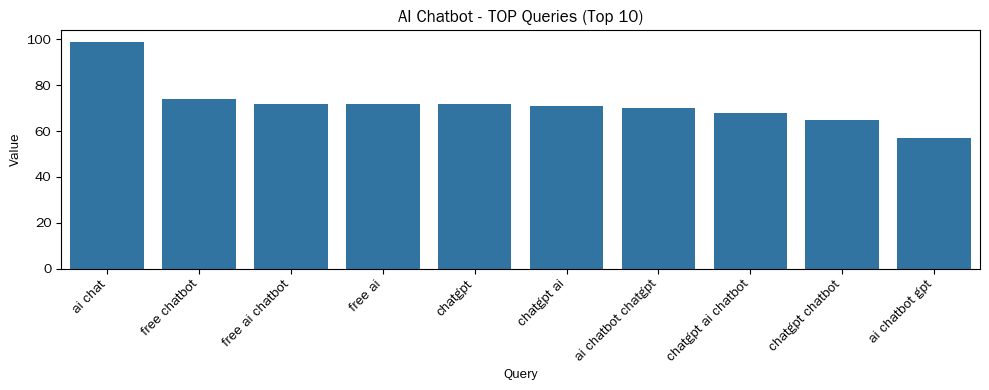

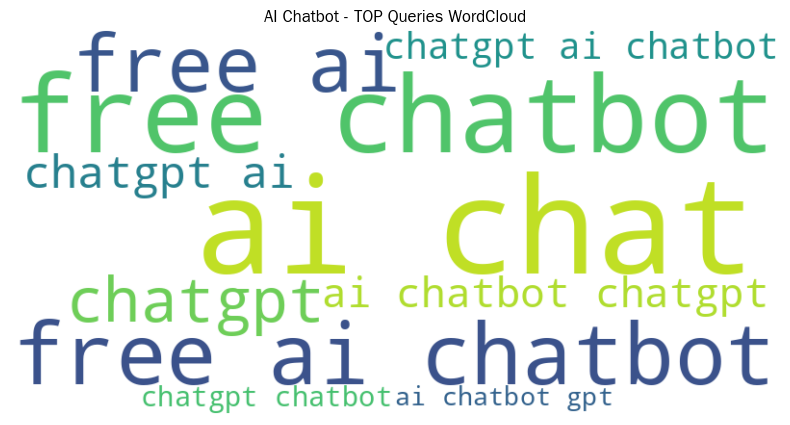

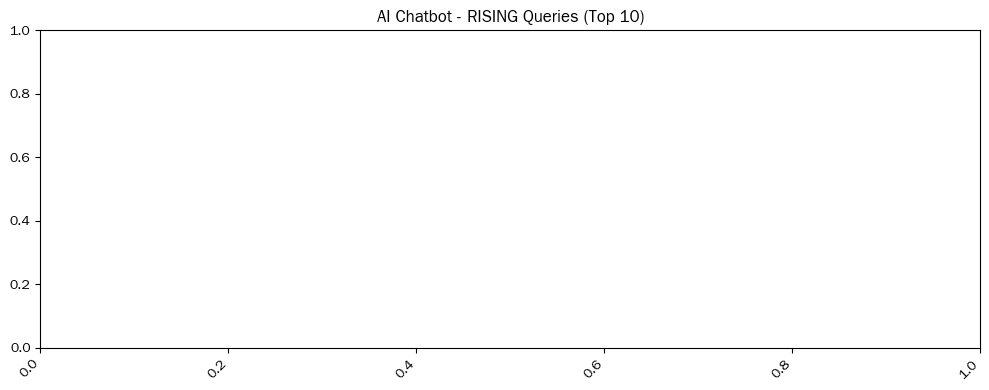

Skipping WordCloud for AI Chatbot - RISING Queries due to no valid numeric values.


In [ ]:
# Plotting for AI Chatbot
plotRelatedQueries(AIChatbotRelatedQueries, "AI Chatbot")

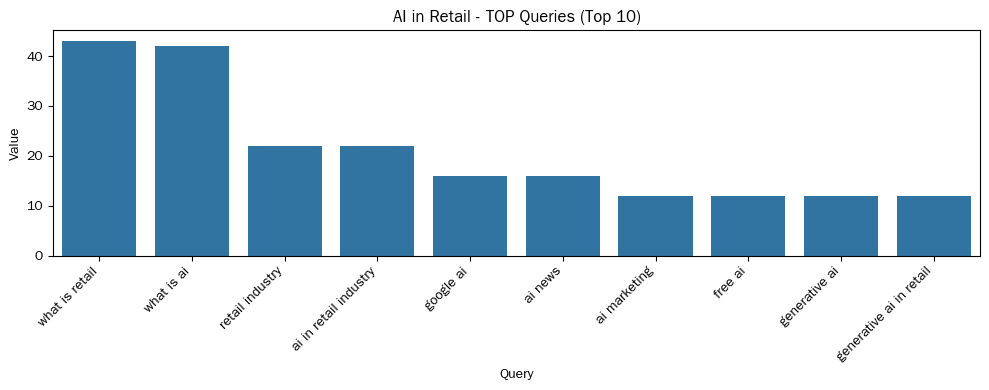

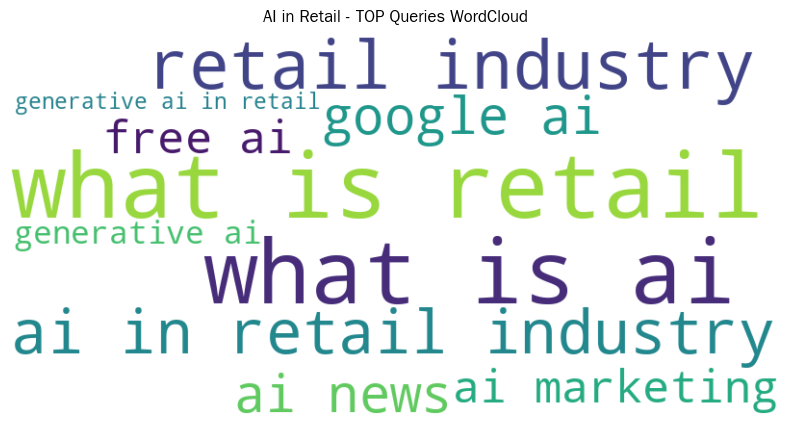

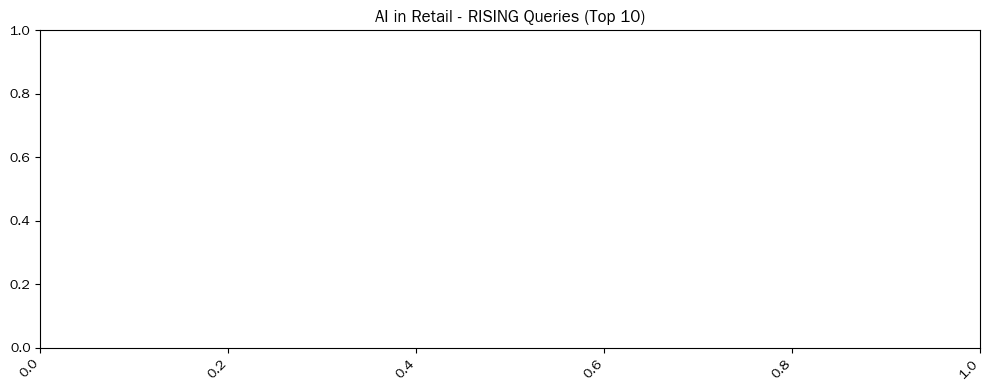

Skipping WordCloud for AI in Retail - RISING Queries due to no valid numeric values.


In [ ]:
# Plotting for AI in Retail
plotRelatedQueries(AIRetailRelatedQueries, "AI in Retail")

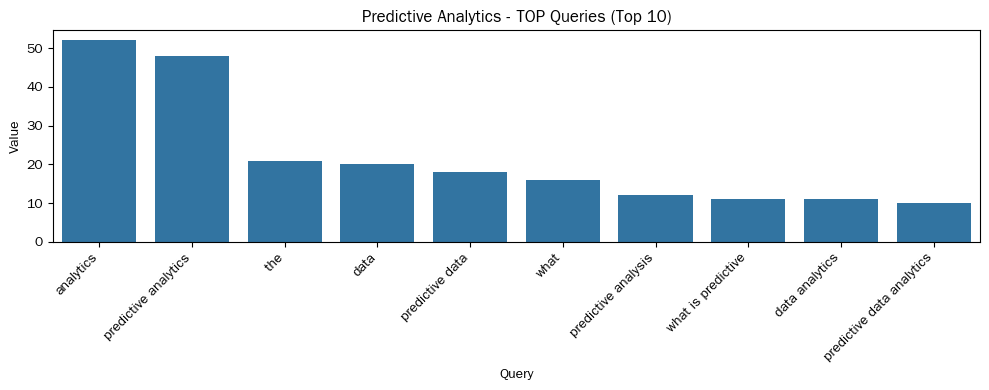

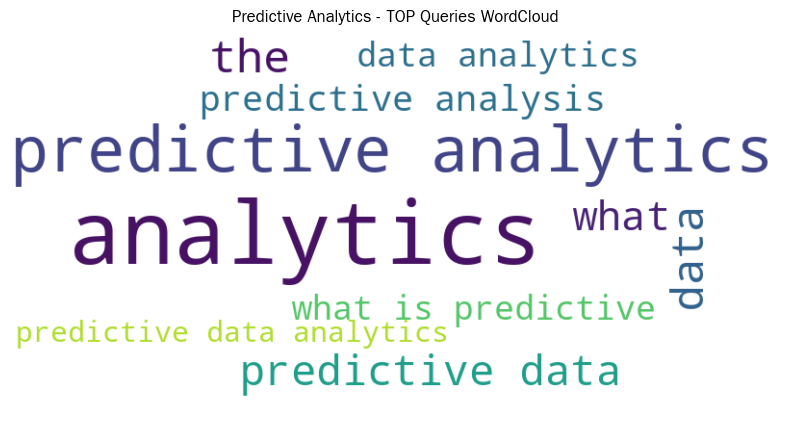

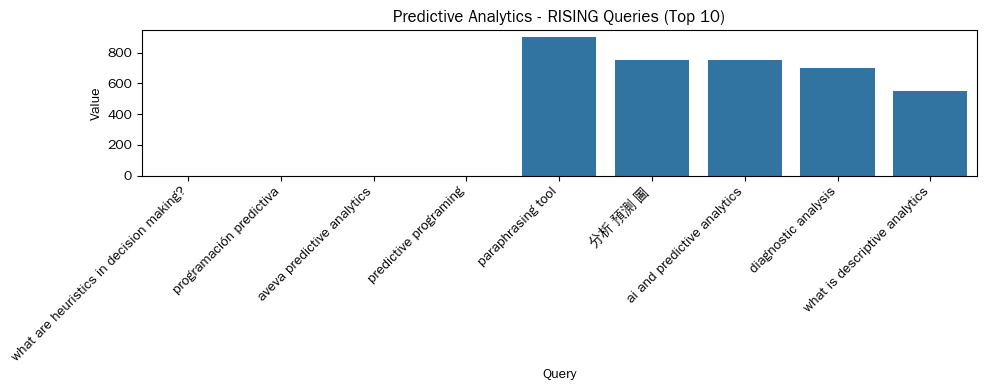

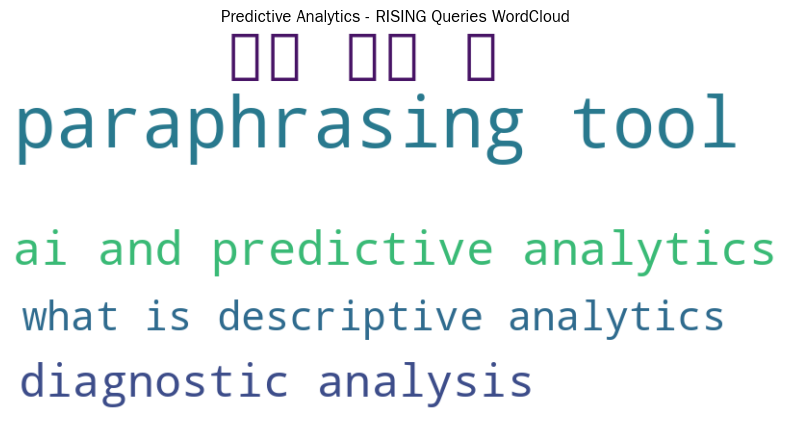

In [ ]:
# Plotting for Predictive Analytics
plotRelatedQueries(PredictiveAnalyticsRelatedQueries, "Predictive Analytics")

In [ ]:
# Creating a summary table of average interest levels
summaryData = {
    'AI Chatbot': ComparedInterestOverTime['AI Chatbot: (Worldwide)'].mean(),
    'AI in Retail': ComparedInterestOverTime['AI in Retail: (Worldwide)'].mean(),
    'Predictive Analytics': ComparedInterestOverTime['Predictive analytics: (Worldwide)'].mean()}

In [ ]:
# Creating a dataframe from the table
SummaryTable = pd.DataFrame(list(summaryData.items()), columns=['Topic','Average Interest'])

In [ ]:
# Displaying the summary table dataframe
display(SummaryTable)

,Topic,Average Interest
0,AI Chatbot,17.965649
1,AI in Retail,1.061069
2,Predictive Analytics,11.652672


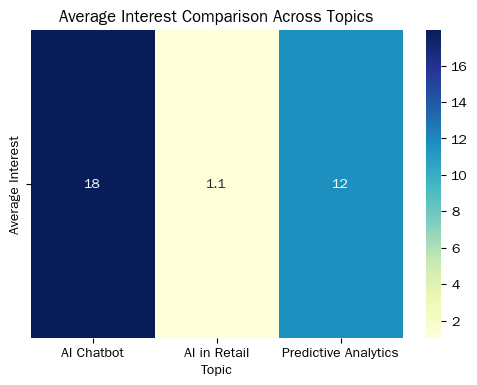

In [ ]:
# Plotting Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(SummaryTable.set_index('Topic').T, annot=True, cmap="YlGnBu")
plt.title('Average Interest Comparison Across Topics')
plt.show()

In [ ]:
# Plotting a Choropleth for AI Chatbot Interest By Region
fig = px.choropleth(
    AIChatbotInterestByRegion,
    locations="Country",
    locationmode="country names",
    color=AIChatbotInterestByRegion.columns[1],
    title="AI Chatbot Interest by Country",
    color_continuous_scale="Blues")
fig.show()

In [ ]:
# Plotting a Choropleth for AI in Retail Interest By Region
fig = px.choropleth(
    AIRetailInterestByRegion,
    locations="Country",
    locationmode="country names",
    color=AIRetailInterestByRegion.columns[1],
    title="AI in Retail Interest by Country",
    color_continuous_scale="Greens")
fig.show()

In [ ]:
# Plotting a Choropleth for Predictive Analytics Interest By Region
fig = px.choropleth(
    PredictiveAnalyticsInterestByRegion,
    locations="Country",
    locationmode="country names",
    color=PredictiveAnalyticsInterestByRegion.columns[1],
    title="Predictive Analytics Interest by Country",
    color_continuous_scale="Oranges")
fig.show()